In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
#This data has been cleaned in the Date and Weather columns. 

ldn = pd.read_csv('/Users/rebeccaswedberg/londonv4.csv')

ldn.head()

,Unnamed: 0,Quarter,Equivalent financial quarter,Site ID,Location,Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes
0,0,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,4.0,0.0
1,1,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,5.0,0.0
2,2,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,11.0,1.0
3,3,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,15.0,1.0
4,4,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,18.0,1.0


In [3]:
ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747751 entries, 0 to 747750
Data columns (total 14 columns):
Unnamed: 0                      747751 non-null int64
Quarter                         747751 non-null object
Equivalent financial quarter    747751 non-null object
Site ID                         747751 non-null object
Location                        747751 non-null object
Date                            747751 non-null object
Weather                         747751 non-null object
Time                            747751 non-null object
Period                          747751 non-null object
Direction                       747751 non-null object
Start hour                      747751 non-null int64
Start minute                    747751 non-null int64
Number of private cycles        747687 non-null float64
Number of cycle hire bikes      747687 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 79.9+ MB


In [4]:
ldn = ldn.rename({'Date ':'Date'},axis='columns')
ldn.head()

,Unnamed: 0,Quarter,Equivalent financial quarter,Site ID,Location,Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes
0,0,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,4.0,0.0
1,1,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,5.0,0.0
2,2,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,11.0,1.0
3,3,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,15.0,1.0
4,4,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,09/07/19,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,18.0,1.0


In [5]:
# Converting the Date to Date time 
ldn['Date'] = pd.to_datetime(ldn['Date'])
ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747751 entries, 0 to 747750
Data columns (total 14 columns):
Unnamed: 0                      747751 non-null int64
Quarter                         747751 non-null object
Equivalent financial quarter    747751 non-null object
Site ID                         747751 non-null object
Location                        747751 non-null object
Date                            747751 non-null datetime64[ns]
Weather                         747751 non-null object
Time                            747751 non-null object
Period                          747751 non-null object
Direction                       747751 non-null object
Start hour                      747751 non-null int64
Start minute                    747751 non-null int64
Number of private cycles        747687 non-null float64
Number of cycle hire bikes      747687 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 79.9+ MB


In [6]:
#Dropping the Unnamed column
ldn = ldn.drop(['Unnamed: 0'], axis=1)

ldn.head()

,Quarter,Equivalent financial quarter,Site ID,Location,Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes
0,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,4.0,0.0
1,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,5.0,0.0
2,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,11.0,1.0
3,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,15.0,1.0
4,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,18.0,1.0


In [7]:
ldn.isnull().sum()

Quarter                          0
Equivalent financial quarter     0
Site ID                          0
Location                         0
Date                             0
Weather                          0
Time                             0
Period                           0
Direction                        0
Start hour                       0
Start minute                     0
Number of private cycles        64
Number of cycle hire bikes      64
dtype: int64

In [8]:
#Checking the median values in private and cycle hires 
print(ldn['Number of private cycles'].median())

print(ldn['Number of cycle hire bikes'].median())

7.0
1.0


In [9]:
#Replacing the null values in bikes with the median values 

# replacing missing values with Other for Weather
ldn['Number of private cycles'].fillna(7, inplace=True)
ldn['Number of cycle hire bikes'].fillna(1, inplace=True)

In [10]:
ldn.isnull().sum()

Quarter                         0
Equivalent financial quarter    0
Site ID                         0
Location                        0
Date                            0
Weather                         0
Time                            0
Period                          0
Direction                       0
Start hour                      0
Start minute                    0
Number of private cycles        0
Number of cycle hire bikes      0
dtype: int64

In [11]:
#Renaming the Cycle hire column
ldn= ldn.rename({'Number of cycle hire bikes':'Number of hired bikes'}, axis = 'columns')

In [12]:
ldn.head()

,Quarter,Equivalent financial quarter,Site ID,Location,Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of hired bikes
0,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,4.0,0.0
1,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,5.0,0.0
2,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,11.0,1.0
3,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,15.0,1.0
4,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,18.0,1.0


# What time period does people cycle the most?

Text(0.5, 1.0, 'Hired bikes')

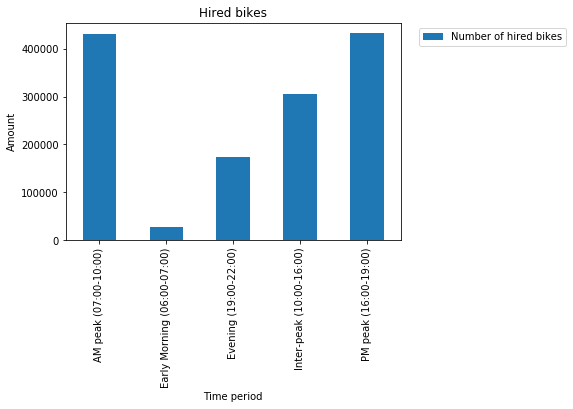

In [13]:
#Creating pivot table for what time people hire a bike 
pd.pivot_table(ldn,index=ldn['Period'],values='Number of hired bikes',aggfunc=np.sum).plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Amount')
plt.xlabel('Time period')
plt.title('Hired bikes')

Text(0.5, 1.0, 'Hired bike per Quarter')

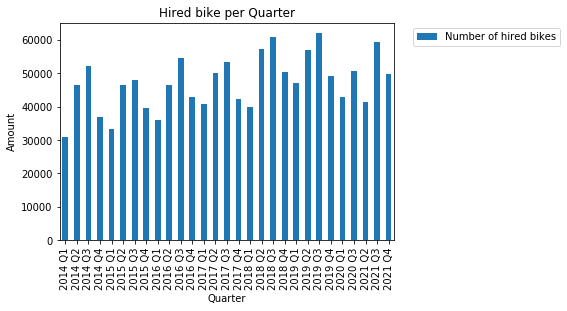

In [14]:
#Creating pivot table for each quarter
pd.pivot_table(ldn,index=ldn['Quarter '],values='Number of hired bikes',aggfunc=np.sum).plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Amount')
plt.xlabel('Quarter')
plt.title('Hired bike per Quarter')

Bike patterns per month

Text(0.5, 1.0, 'Hired bikes per Month')

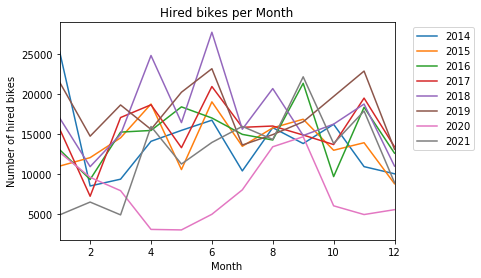

In [15]:
pd.pivot_table(ldn,index=ldn['Date'].dt.month,columns=ldn['Date'].dt.year,
               values='Number of hired bikes',aggfunc=np.sum).plot()
plt.ylabel('Number of hired bikes')
plt.xlabel('Month')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Hired bikes per Month')

Text(0.5, 1.0, 'Private bike riders per Month')

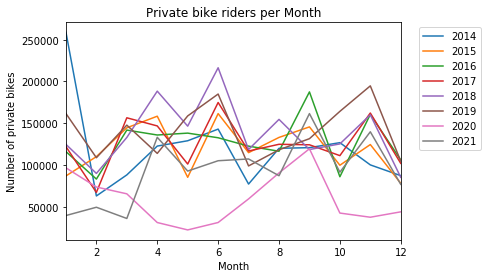

In [16]:
pd.pivot_table(ldn,index=ldn['Date'].dt.month,columns=ldn['Date'].dt.year,
               values='Number of private cycles',aggfunc=np.sum).plot()
plt.ylabel('Number of private bikes')
plt.xlabel('Month')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Private bike riders per Month')

 # What type of weather do people cycle the most?

In [17]:
ldn['Weather'].value_counts()

Dry       609569
Wet        75922
Other      30950
Fine       18846
Rain        5408
Cloudy      4394
Sunny       2662
Name: Weather, dtype: int64

Text(0.5, 1.0, 'Hired Bikes per Weather Condition')

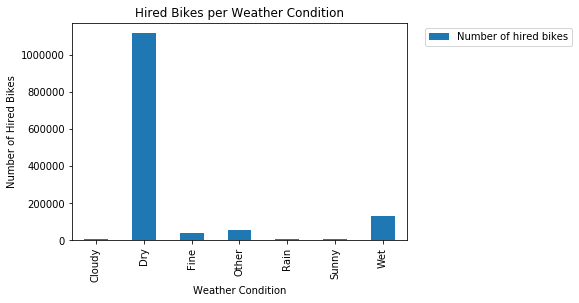

In [18]:
pd.pivot_table(ldn,index=ldn['Weather'],
               values='Number of hired bikes',aggfunc=np.sum).plot(kind='bar')
plt.ylabel('Number of Hired Bikes')
plt.xlabel('Weather Condition')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Hired Bikes per Weather Condition')

In [19]:
# Looking closer at the Dry weather data
#Creating a subset of the date filtering on when the weather is Dry 
dry_weather = ldn[ldn['Weather'].apply(lambda x:
                                     "dry" in x.lower())]

dry_weather

,Quarter,Equivalent financial quarter,Site ID,Location,Date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of hired bikes
0,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,4.0,0.0
1,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,5.0,0.0
2,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,11.0,1.0
3,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,15.0,1.0
4,2019 Q3,2019-20 Q2,CENCY062,Charing Cross Road,2019-09-07,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747746,2019 Q4,2019-20 Q3,CENCY098,Horseferry Road (east of Tufton Street),2019-10-30,Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20,45,2.0,1.0
747747,2019 Q4,2019-20 Q3,CENCY098,Horseferry Road (east of Tufton Street),2019-10-30,Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21,0,0.0,0.0
747748,2019 Q4,2019-20 Q3,CENCY098,Horseferry Road (east of Tufton Street),2019-10-30,Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21,15,0.0,0.0
747749,2019 Q4,2019-20 Q3,CENCY098,Horseferry Road (east of Tufton Street),2019-10-30,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21,30,1.0,0.0


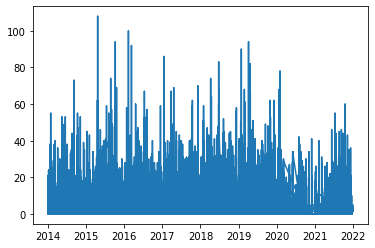

In [20]:
plt.plot('Date', 'Number of hired bikes',data=dry_weather)